In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Cancer Diagnosis

The following dataset contains cancer gene-expression levels (16,063 genes, 144 samples) from *Multiclass cancer diagnosis using tumor gene expression signatures (Golub et all, 2001)*

In [48]:
url1 = 'https://raw.githubusercontent.com/um-perez-alvaro/lin-regress/master/14cancer.xtrain'
url2 = 'https://raw.githubusercontent.com/um-perez-alvaro/lin-regress/master/14cancer.xtest'

data_train = pd.read_csv(url1,sep = '\s+',header = None)
data_train = data_train.T

data_test = pd.read_csv(url2,sep = '\s+',header = None)
data_test = data_test.T

data_test.head(5) 

,0,1,2,3,4,5,6,7,8,9,...,16053,16054,16055,16056,16057,16058,16059,16060,16061,16062
0,-44.0,-254.0,-166.0,-55.0,-130.0,-133.0,80.0,-62.0,1.0,22.0,...,-51.0,715.0,25.0,47.0,-270.0,-265.0,-290.0,-235.0,-826.0,-262.0
1,-13.0,-124.0,-206.0,-29.0,-117.0,-114.0,111.0,-20.0,-25.0,18.0,...,-57.0,695.0,10.0,57.0,-50.0,-45.0,-61.0,-22.0,-263.0,-52.0
2,-64.3,-184.9,-334.4,-102.2,-289.0,-145.2,-251.9,-150.9,-184.0,179.1,...,-173.4,1324.6,9.8,127.7,244.0,76.5,100.1,-69.6,-1444.3,-121.6
3,-22.0,-169.0,-164.0,-32.0,-49.0,-141.0,0.0,-22.0,16.0,67.0,...,21.0,170.0,20.0,35.0,-275.0,-230.0,-136.0,-228.0,-404.0,-259.0
4,-28.0,-167.0,-158.0,100.0,-129.0,-232.0,148.0,-48.0,14.0,164.0,...,-66.0,1627.0,76.0,119.0,-6.0,68.0,-22.0,27.0,-1088.0,-58.0


In [51]:
labels_train.shape, labels_test.shape

((144, 1), (54, 1))

In [53]:
144+54

198

In [40]:
url1 = 'https://raw.githubusercontent.com/um-perez-alvaro/lin-regress/master/14cancerlabels.ytrain'
url2 = 'https://raw.githubusercontent.com/um-perez-alvaro/lin-regress/master/14cancer.ytest'

labels_train = pd.read_csv(url1,sep='\s+',header = None)
labels_train = labels_train.T

labels_test = pd.read_csv(url2,sep='\s+',header = None)
labels_test = labels_test.T

labels_train.head(5)

,0
0,1
1,1
2,1
3,1
4,1


In [46]:
labels_train = labels_train.rename({0 : 'label'}, axis=1)
labels_test = labels_test.rename({0 : 'label'}, axis=1)

In [55]:
df1 = pd.concat([data_train,labels_train],axis=1)
df2 = pd.concat([data_test,labels_test],axis=1)
df1.shape,df2.shape

((144, 16064), (54, 16064))

In [56]:
data = pd.concat([df1,df2])
data.shape

(198, 16064)

In [59]:
data.to_csv('cancer_genes.csv',index=None)

# Start Here

In [60]:
cancer = pd.read_csv('cancer_genes.csv')
cancer.head()

,0,1,2,3,4,5,6,7,8,9,...,16054,16055,16056,16057,16058,16059,16060,16061,16062,label
0,-73.0,-69.0,-48.0,13.0,-86.0,-147.0,-65.0,-71.0,-32.0,100.0,...,352.0,-67.0,121.0,-5.0,-11.0,-21.0,-41.0,-967.0,-120.0,1
1,-16.0,-63.0,-97.0,-42.0,-91.0,-164.0,-53.0,-77.0,-17.0,122.0,...,244.0,-15.0,119.0,-32.0,4.0,-14.0,-28.0,-205.0,-31.0,1
2,4.0,-45.0,-112.0,-25.0,-85.0,-127.0,56.0,-110.0,81.0,41.0,...,163.0,-14.0,7.0,15.0,-8.0,-104.0,-36.0,-245.0,34.0,1
3,-31.0,-110.0,-20.0,-50.0,-115.0,-113.0,-17.0,-40.0,-17.0,80.0,...,625.0,18.0,59.0,-10.0,32.0,-2.0,10.0,-495.0,-37.0,1
4,-33.0,-39.0,-45.0,14.0,-56.0,-106.0,73.0,-34.0,18.0,64.0,...,398.0,38.0,215.0,-2.0,44.0,3.0,68.0,-293.0,-34.0,1


In [63]:
# feature matrix X/target vector y
X = cancer.iloc[:,:16063]
y = cancer.label

In [65]:
y_leuk = y.apply(lambda x : 1 if x == 9 else 0)
y_leuk.value_counts()

0    168
1     30
Name: label, dtype: int64

In [74]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y_leuk)

In [134]:
from sklearn.linear_model import Lasso,Ridge

In [136]:
lasso_reg = Lasso(alpha=1)
ridge_reg = Lasso(alpha=1)

In [148]:
lasso_reg.fit(X_train, y_train)

C:\Users\javier.perez-alvaro\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.05009218907019658, tolerance: 0.0018729729729729725
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=1)

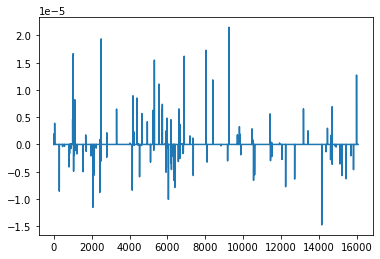

In [149]:
plt.plot(lasso_reg.coef_)

In [150]:
len(lasso_reg.coef_)

16063

In [151]:
np.sum(lasso_reg.coef_==0)

15924

In [152]:
y_test_pred = lasso_reg.predict(X_test)
y_test_pred

array([-4.91795209e-02, -3.71743277e-02,  4.96722845e-04,  3.46070991e-02,
        1.57097995e-02,  4.31209548e-03, -7.52391644e-02, -3.47387605e-02,
        9.01064748e-01,  2.60707713e-02,  6.64498394e-03, -2.48182265e-01,
       -2.42762518e-02, -5.49986679e-03,  2.71684689e-04, -1.08782364e-02,
        8.62762523e-01,  9.23182509e-02,  2.59551086e-02, -7.81544280e-02,
        2.59347368e-02,  4.24868413e-02, -4.59263582e-02,  2.16673583e-03,
        1.55053245e-02,  3.24161830e-03,  1.29097516e-02,  2.60584997e-03,
        3.25058672e-02,  6.96915092e-01,  6.60568364e-02,  5.51389151e-02,
        1.09456134e+00, -2.09846995e-02,  1.43683179e-02, -1.88011628e-01,
        6.34049068e-01, -1.79111351e-02,  4.59449329e-02,  1.20031316e+00,
        2.87673180e-02,  1.06132368e-02,  6.29693547e-03,  1.30067187e-02,
        2.05284365e-02,  8.05833044e-01,  7.81968298e-04,  1.04474848e+00,
        1.43829663e-02, -7.72299873e-02])

In [153]:
y_test_leuk = np.zeros(len(y_test_pred))
y_test_leuk[y_test_pred>0.5] = 1

In [154]:
y_test_leuk

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.])

In [155]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_test_leuk)

array([[42,  0],
       [ 0,  8]], dtype=int64)